In [1]:
import import_ipynb
from AlexNetModel import AlexNet_v1,AlexNet_v2

importing Jupyter notebook from AlexNetModel.ipynb


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 不会多线程
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os
os.getcwd()

'/home/zuoyuhui/paper/AlexNet'

In [13]:
data_root = os.path.abspath(os.path.join(os.getcwd(),"../../datasets"))
image_path = data_root+"/flower_data/"
train_dir = image_path+'train'
validation_dir = image_path+'val'

In [4]:
if not os.path.exists('save_weights'):
    os.mkdir('save_weights')

In [5]:
im_height = 224
im_width = 224
batch_size = 32
epochs = 10

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255.,horizontal_flip=True)
validation_image_generator = ImageDataGenerator(rescale=1./255.)
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,batch_size=batch_size,
                                                          shuffle=True,target_size=(im_height,im_width),
                                                          class_mode='categorical')
total_train = train_data_gen.n
total_train

Found 3306 images belonging to 5 classes.


3306

In [7]:
class_indices = train_data_gen.class_indices
class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [8]:
inverse_dict = dict((val,key) for key,val in class_indices.items())
inverse_dict

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [10]:
json_str = json.dumps(inverse_dict,indent=4)
json_str

'{\n    "0": "daisy",\n    "1": "dandelion",\n    "2": "roses",\n    "3": "sunflowers",\n    "4": "tulips"\n}'

In [11]:
with open('class_indices.json','w') as json_file:
    json_file.write(json_str)

In [14]:
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,batch_size=batch_size,
                                                              shuffle=True,target_size=(im_height,im_width),class_mode='categorical')
total_val = val_data_gen.n

Found 364 images belonging to 5 classes.


In [23]:
# 载入图像信息
sample_training_images,sample_training_labels = next(train_data_gen)
def plotImage(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
sample_training_images.shape

(32, 224, 224, 3)

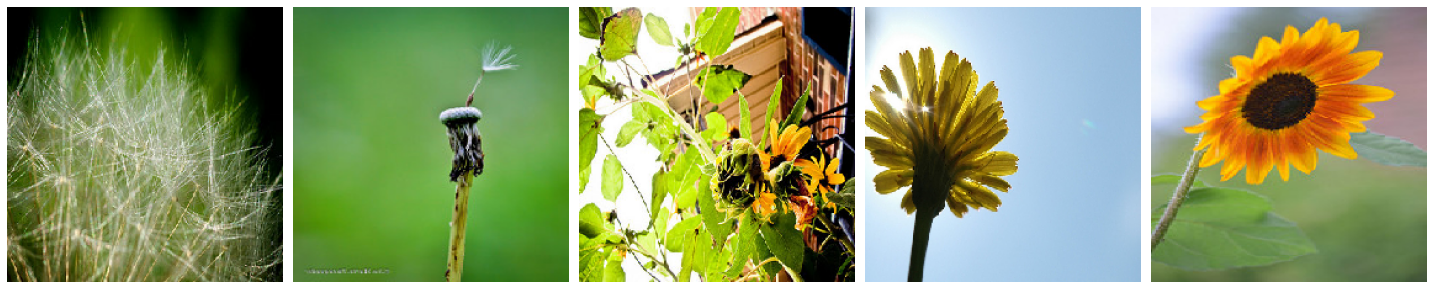

In [24]:
plotImage(sample_training_images[:5])

In [25]:
sample_training_labels

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
model = AlexNet_v1(im_height=im_height,im_width=im_width,class_num=5)
# model = AlexNet_v2(class_num=5)
# model.buibatch_sizeh_size,224,224,3))

In [28]:
model.summary()   
"""
17472 = 11*11*3*48+48
153728 = 5*5*128*48+128
221376 = 3*3*192*128+192
331968 = 3*3*192*192+192
221312 = 3*3*128*192+128

9439232=4608*2048+2048
4196352=2048*2048+2048
10245=5*2048+5
"""

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 48)        17472     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 128)       153728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 192)       221376

'\n17472 = 11*11*3*48+48\n153728 = 5*5*128*48+128\n221376 = 3*3*192*128+192\n331968 = 3*3*192*192+192\n221312 = 3*3*128*192+128\n\n9439232=4608*2048+2048\n4196352=2048*2048+2048\n10245=5*2048+5\n'

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #因为已经softmax所以false
             metrics=["accuracy"])

In [30]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='./save_weights/myAlex.h5',
                                               save_best_only=True,save_weights_only=True,monitor='val_loss')] #该回调函数将在每个epoch后保存模型到filepath 

In [31]:
# 2.1常用fit 之前用fit_generator
history = model.fit(x=train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,
                   validation_data=val_data_gen,validation_steps=total_val//batch_size,callbacks=callbacks)

Train for 103 steps, validate for 11 steps
Epoch 1/10
103/103 [==============================] - 24s 232ms/step - loss: 1.5906 - accuracy: 0.2633 - val_loss: 1.5122 - val_accuracy: 0.2642
Epoch 2/10
103/103 [==============================] - 20s 195ms/step - loss: 1.4034 - accuracy: 0.3867 - val_loss: 1.1278 - val_accuracy: 0.5398
Epoch 3/10
103/103 [==============================] - 18s 176ms/step - loss: 1.1170 - accuracy: 0.5476 - val_loss: 1.0109 - val_accuracy: 0.5625
Epoch 4/10
103/103 [==============================] - 17s 164ms/step - loss: 1.0182 - accuracy: 0.5828 - val_loss: 0.8963 - val_accuracy: 0.6136
Epoch 5/10
103/103 [==============================] - 17s 169ms/step - loss: 0.9437 - accuracy: 0.6142 - val_loss: 0.8531 - val_accuracy: 0.6364
Epoch 6/10
103/103 [==============================] - 18s 171ms/step - loss: 0.8699 - accuracy: 0.6558 - val_loss: 0.8249 - val_accuracy: 0.6506
Epoch 7/10
103/103 [==============================] - 17s 167ms/step - loss: 0.8096 - a

In [34]:
history_dict = history.history
history_dict

{'loss': [1.591173911356824,
  1.4034478591576391,
  1.1184542506805775,
  1.020025997134193,
  0.9453113135143832,
  0.8711594339180225,
  0.8119705758702122,
  0.7973828451911633,
  0.7436884116784203,
  0.6989374713484078],
 'accuracy': [0.2632865,
  0.38668296,
  0.54764813,
  0.5827734,
  0.6142334,
  0.65577275,
  0.686011,
  0.68723273,
  0.71319485,
  0.73121566],
 'val_loss': [1.5122405940836126,
  1.127841131253676,
  1.0109168670394204,
  0.8962728435342963,
  0.8530728166753595,
  0.8249077471819791,
  0.8994153250347484,
  0.9382735870101235,
  0.7540895722129128,
  0.7676064751364968],
 'val_accuracy': [0.26420453,
  0.53977275,
  0.5625,
  0.6136364,
  0.6363636,
  0.6505682,
  0.65340906,
  0.61647725,
  0.71875,
  0.6875]}

In [33]:
train_loss = history_dict['loss']
train_accuracy = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

Text(0, 0.5, 'loss')

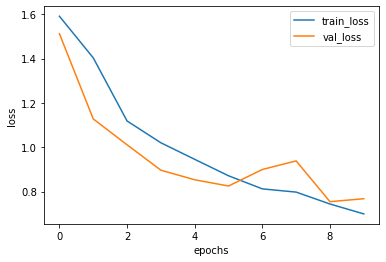

In [35]:
plt.figure()
plt.plot(range(epochs),train_loss,label='train_loss')
plt.plot(range(epochs),val_loss,label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

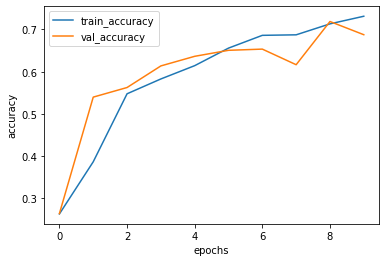

In [36]:
plt.figure()
plt.plot(range(epochs),train_accuracy,label='train_accuracy')
plt.plot(range(epochs),val_accuracy,label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [40]:
# using keras low level api for training
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')


@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = model(images,training=True)
        loss = loss_object(labels,predictions)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels,predictions)
    
@tf.function
def test_step(images,labels):
    predictions = model(images,training=False)
    t_loss = loss_object(labels,predictions)
    
    test_loss(t_loss)
    test_accuracy(labels,predictions)
    
best_test_loss = float('inf')
for epoch in range(1,epochs+1):
    train_loss.reset_states()  # clear history info
    train_accuracy.reset_states() # clear history info
    test_loss.reset_states() # clear history info
    test_accuracy.reset_states() # clear history info
    
    for step in range(total_train//batch_size):
        images,labels = next(train_data_gen)
        train_step(images,labels)
        
    for step in range(total_val//batch_size):
        test_images,test_labels=next(val_data_gen)
        test_step(test_images,test_labels)
        
    template = 'Epoch{},Loss:{},Accuracy:{},Test Loss:{},Test Accuracy:{}'
    print(template.format(epoch,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result()*100))
    
    if test_loss.result() < best_test_loss:
        model.save_weights('./save_weights/myAlex_low.ckpt',save_format='tf')

Epoch1,Loss:0.5892159342765808,Accuracy:77.67256927490234,Test Loss:0.7568424344062805,Test Accuracy:68.67469787597656
Epoch2,Loss:0.5380539298057556,Accuracy:78.95540618896484,Test Loss:0.6405618190765381,Test Accuracy:75.90361022949219
Epoch3,Loss:0.5063298940658569,Accuracy:80.63530731201172,Test Loss:0.6748160719871521,Test Accuracy:71.98795318603516
Epoch4,Loss:0.4608001410961151,Accuracy:82.34575653076172,Test Loss:0.613502562046051,Test Accuracy:75.0
Epoch5,Loss:0.4448799192905426,Accuracy:83.56749725341797,Test Loss:0.7396978139877319,Test Accuracy:71.38554382324219
Epoch6,Loss:0.41330936551094055,Accuracy:84.51435852050781,Test Loss:0.6690438389778137,Test Accuracy:76.50602722167969
Epoch7,Loss:0.38254624605178833,Accuracy:86.46844482421875,Test Loss:0.8803184032440186,Test Accuracy:66.5662612915039
Epoch8,Loss:0.3756030201911926,Accuracy:85.67501068115234,Test Loss:0.6330432295799255,Test Accuracy:76.50602722167969
Epoch9,Loss:0.3052409887313843,Accuracy:88.33231353759766,Tes